#Pre-processing

## Filter out anomallys

In [ ]:
#filter data by removing max ntc at cycle 20
thresh = 0.2
cycle_thresh = 20

for i in ad_only.columns:
  avg = sum(ad_only[i][0:5])/5
  ad_only[i] = ad_only[i] - avg
  if ad_only[i][cycle_thresh] < thresh:
    ad_only = ad_only.drop(columns = i)

for i in ia_only.columns:
  avg = sum(ia_only[i][0:5])/5
  ia_only[i] = ia_only[i] - avg
  if ia_only[i][cycle_thresh] < thresh:
    ia_only = ia_only.drop(columns = i)

for i in ib_only.columns:
  avg = sum(ib_only[i][0:5])/5
  ib_only[i] = ib_only[i] - avg
  if ib_only[i][cycle_thresh] < thresh:
    ib_only = ib_only.drop(columns = i)

for i in kp_only.columns:
  avg = sum(kp_only[i][0:5])/5
  kp_only[i] = kp_only[i] - avg
  if kp_only[i][cycle_thresh] < thresh:
    kp_only = kp_only.drop(columns = i)

for i in c19_only.columns:
  avg = sum(c19_only[i][0:5])/5
  c19_only[i] = c19_only[i] - avg
  if c19_only[i][cycle_thresh] < thresh:
    c19_only = c19_only.drop(columns = i)

for i in ntc_only.columns:
  avg = sum(ntc_only[i][0:5])/5
  ntc_only[i] = ntc_only[i] - avg


In [ ]:
ad_melt_only = ad_melt_only[list(ad_only.columns.values)]
ia_m_only = ia_m_only[list(ia_only.columns.values)]
ib_m_only = ib_m_only[list(ib_only.columns.values)]
kp_m_only = kp_m_only[list(kp_only.columns.values)]
c19_m_only = c19_m_only[list(c19_only.columns.values)]
ntc_m_only = ntc_m_only[list(ntc_only.columns.values)]

In [ ]:
all_melt = np.vstack((ad_melt_only.T.to_numpy(),ia_m_only.T.to_numpy(),ib_m_only.T.to_numpy(),kp_m_only.T.to_numpy(),c19_m_only.T.to_numpy()))

In [ ]:
#header array
headers = ["" for x in range(ad_only.shape[1]+ia_only.shape[1]+ib_only.shape[1]+kp_only.shape[1]+c19_only.shape[1])]
i = 0
for col in ad_only.columns:
  exp = ad_df.loc[ad_df['Curve_ID'] == col]["Exp_ID"]
  channel = ad_df.loc[ad_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
for col in ia_only.columns:
  exp = ia_df.loc[ia_df['Curve_ID'] == col]["Exp_ID"]
  channel = ia_df.loc[ia_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
for col in ib_only.columns:
  exp = ib_df.loc[ib_df['Curve_ID'] == col]["Exp_ID"]
  channel = ib_df.loc[ib_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
for col in kp_only.columns:
  exp = kp_df.loc[kp_df['Curve_ID'] == col]["Exp_ID"]
  channel = kp_df.loc[kp_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
for col in c19_only.columns:
  exp = c19_df.loc[c19_df['Curve_ID'] == col]["Exp_ID"]
  channel = c19_df.loc[c19_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
headers = np.asarray(headers)

In [ ]:
for col in ad_only.columns:
  exp = ad_df.loc[ad_df['Curve_ID'] == col]["Exp_ID"]
  channel = ad_df.loc[ad_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
for col in ia_only.columns:
  exp = ia_df.loc[ia_df['Curve_ID'] == col]["Exp_ID"]
  channel = ia_df.loc[ia_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
for col in ib_only.columns:
  exp = ib_df.loc[ib_df['Curve_ID'] == col]["Exp_ID"]
  channel = ib_df.loc[ib_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
for col in kp_only.columns:
  exp = kp_df.loc[kp_df['Curve_ID'] == col]["Exp_ID"]
  channel = kp_df.loc[kp_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
for col in c19_only.columns:
  exp = c19_df.loc[c19_df['Curve_ID'] == col]["Exp_ID"]
  channel = c19_df.loc[c19_df['Curve_ID'] == col]["Channel"]
  headers[i]=exp+channel
  i+=1
headers = np.asarray(headers)

In [ ]:
#processed curve array
all_curves = np.vstack((ad_only.T.to_numpy(),ia_only.T.to_numpy(),ib_only.T.to_numpy(),kp_only.T.to_numpy(),c19_only.T.to_numpy(),))

## Feature Extraction

In [ ]:
def sigmoid_func(t, F_m, F_b, S_c, C_s, A_s):
    return F_m/(1+np.power( np.exp(-S_c*(t-C_s)) , A_s))+F_b
  #A_s never goes below 1 usually, upper bound is difficult

In [ ]:
target_list = [ad_only, ia_only, ib_only, kp_only, c19_only]
all_data = np.zeros((ad_only.shape[1]+ia_only.shape[1]+ib_only.shape[1]+kp_only.shape[1]+c19_only.shape[1],5))

j = 0
for targets in target_list:
  num_samples = targets.shape[1]
  rand_samp = random.sample(targets.columns.values.tolist(),num_samples)
  #F_m, F_b, S_c, C_s, A_s
  #popt = np.zeros((num_samples,5))
  for i in rand_samp:
    all_data[j], pcov = curve_fit(sigmoid_func, range(1, 36), targets[i], p0=[1,0,0.2,15,1], bounds = ([0,-0.2,0,0,0],[2,0.2,0.5,35,10]))
    j = j + 1

In [ ]:
class_name_1 = np.full((ad_only.shape[1]),'ad')
class_name_2 = np.full((ia_only.shape[1]),'ia')
class_name_3 = np.full((ib_only.shape[1]),'ib')
class_name_4 = np.full((kp_only.shape[1]),'kp')
class_name_5 = np.full((c19_only.shape[1]),'c19')

In [ ]:
class_all = np.concatenate((class_name_1,class_name_2,class_name_3,class_name_4,class_name_5)).T

In [ ]:
class_all.shape

(50456,)

In [ ]:
model_input = np.vstack((class_all, all_data.T)).T

In [ ]:
input_df = pd.DataFrame(model_input, columns = ['target', 'F_m', 'F_b','S_c', 'C_s', 'A_s'])

In [ ]:
processed_curve = np.vstack((ad_only.T,ia_only.T,ib_only.T,kp_only.T,c19_only.T))

In [ ]:
save_np = np.hstack((headers, model_input, all_curves,all_melt))

In [ ]:
save_df = pd.DataFrame(save_np, columns = ['group_ID','target', 'F_m', 'F_b','S_c', 'C_s', 'A_s',"1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", '65','65.5','66','66.5','67','67.5','68','68.5','69','69.5','70','70.5','71','71.5','72','72.5','73','73.5','74','74.5','75','75.5','76','76.5','77','77.5','78','78.5','79','79.5','80','80.5','81','81.5','82','82.5','83','83.5','84','84.5','85','85.5','86','86.5','87','87.5','88','88.5','89','89.5','90','90.5','91','91.5','92','92.5','93','93.5','94','94.5','95','95.5','96','96.5'])

In [ ]:
save_df

,group_ID,target,F_m,F_b,S_c,C_s,A_s,1,2,3,...,92,92.5,93,93.5,94,94.5,95,95.5,96,96.5
0,20201202_01panel31,ad,0.9420438053265123,0.0012527470387622766,0.2539924931335005,19.253639814060698,2.610805616289354,0.00309,0.000707,-0.001327,...,0.00603,0.001871,0.001229,0.001067,0.00082,0.000582,0.000482,0.000332,0.000496,0.000212
1,20201202_01panel32,ad,0.9105430532419178,0.001110027131329733,0.2563459271937746,19.661297632387537,2.6889740620304203,0.017865,0.00676,-0.004108,...,0.006748,0.001732,0.001235,0.000874,0.000732,0.000909,0.000868,0.000665,0.000351,-0.000205
2,20201202_01panel32,ad,0.8387259307542754,-0.010714735555865417,0.26920990851540655,14.463543232617704,3.076446196115845,0.018346,0.007313,-0.003313,...,0.031434,0.003747,0.001646,0.001184,0.000977,0.000771,0.001031,0.001077,0.000906,0.000962
3,20201202_01panel32,ad,1.033906535810755,0.01044429618783616,0.27563886403775867,16.33566433938529,3.269696746925492,0.016965,0.006747,-0.003131,...,0.012396,0.001888,0.001087,0.000865,0.000864,0.000889,0.000759,0.000503,0.000409,0.000143
4,20201202_01panel32,ad,0.9136837206706485,-0.004061167156248549,0.2421593587616691,22.396715550146496,2.537709523780201,0.004084,0.001855,-0.000651,...,0.008702,0.002942,0.001719,0.001291,0.00086,0.000802,0.000722,0.000591,0.00011,0.000104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50451,20210209_01panel46,c19,0.967448636169165,0.008629499390563945,0.26827829207610626,21.223914313381027,3.0335410361066324,0.001672,-0.000025,-0.00118,...,0.000782,0.000825,0.000751,0.000746,0.000708,0.000436,0.000485,0.000607,0.000701,0.001372
50452,20210209_01panel46,c19,1.1561378731089613,0.02424971613602173,0.280011654858601,21.108786763670874,3.398748968093568,-0.000668,-0.001128,-0.001843,...,0.000462,0.000254,0.000221,0.000205,0.000349,0.000386,0.000639,0.000779,0.000908,0.001074
50453,20210209_01panel46,c19,1.2263903882010385,0.02081993679531072,0.26746557401225435,21.10778209158422,3.022116065353128,0.0003,-0.000548,-0.001575,...,0.000899,0.000899,0.000777,0.000691,0.000563,0.000375,0.000102,0.000106,0.000104,-0.000036
50454,20210209_01panel46,c19,1.2436823902005316,0.005714333251295272,0.275955924477537,18.077240201948296,3.2811482010328823,-0.000213,-0.000936,-0.001,...,0.000474,0.000409,0.000521,0.000667,0.0007,0.000718,0.000624,0.000534,0.000147,0.000556


##Export to CSV

In [ ]:
path = 'gdrive/My Drive/Colab Notebooks/LAMP/output.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  save_df.to_csv(f)

#Simple Machine Learning Algorithm

##Imports

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GroupKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#from sklearn.externals import joblib
save_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/output.csv')


## Read Data In

In [ ]:
factor = pd.factorize(save_df['target'])
save_df.target = factor[0]
definitions = factor[1]
print(save_df.target.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
Int64Index([0, 1, 2, 3, 4], dtype='int64')


## 5 param only

In [ ]:
#Splitting the data into independent and dependent variables
X = save_df.iloc[:,3:8].values
y = save_df.iloc[:,2].values
codes = save_df.iloc[:,1].values

In [ ]:
panel_random = np.random.choice(np.unique(codes),30)
test_ind = []
for names in panel_random:
  index = np.where(codes == names)[0]
  test_ind = np.append(test_ind, index,axis = 0)

test_ind = (np.rint(test_ind)).astype(int)
train_ind = np.arange(0,y.shape[0],1)
train_ind = np.delete(train_ind,test_ind)

In [ ]:
X_train = X[train_ind]
X_test = X[test_ind]
y_train = y[train_ind]
y_test = y[test_ind]

Text(0.5, 1.0, 'Class Distribution in Test Set')

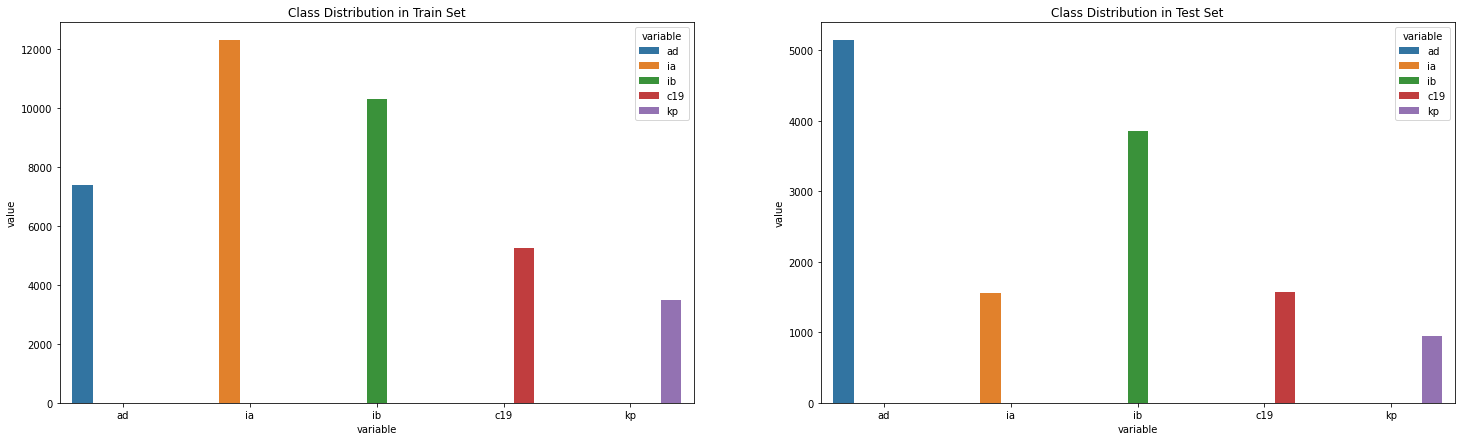

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')
## Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Test Set')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred_rf = classifier.predict(X_test)

# Results
result = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred_rf)
print('Classification Report:')
print (result1)
result2 = accuracy_score(y_test,y_pred_rf)
print('Accuracy:',result2)
rf_5param = result2

Confusion Matrix:
[[2260   25    1   15   11]
 [  64 2646   19   16   25]
 [  10   30 2765   23    1]
 [  42   44   23 1129   56]
 [  23   65    6   50  743]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2312
           1       0.94      0.96      0.95      2770
           2       0.98      0.98      0.98      2829
           3       0.92      0.87      0.89      1294
           4       0.89      0.84      0.86       887

    accuracy                           0.95     10092
   macro avg       0.93      0.92      0.93     10092
weighted avg       0.95      0.95      0.95     10092

Accuracy: 0.9456004756242569


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred_knn =knn_clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred_knn)
print('Classification Report:')
print (result1)
result2 = accuracy_score(y_test,y_pred_knn)
print('Accuracy:',result2)

knn_5param = result2

Confusion Matrix:
[[4614  143   13  301   70]
 [  71 1463   18    3    5]
 [  54   53 3687   41   16]
 [ 214   53   15 1169  122]
 [  44   61   20   62  756]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5141
           1       0.83      0.94      0.88      1560
           2       0.98      0.96      0.97      3851
           3       0.74      0.74      0.74      1573
           4       0.78      0.80      0.79       943

    accuracy                           0.89     13068
   macro avg       0.85      0.87      0.86     13068
weighted avg       0.90      0.89      0.90     13068

Accuracy: 0.8944750535659627


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
#change to log_loss in recent versions
clf = SGDClassifier(loss = 'log', alpha = 1.e-04,  l1_ratio = 1., max_iter = 1000, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

LR_L1_5param = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

clf = RidgeClassifier(alpha = 1.e-04, max_iter = 200)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

LR_L2_5param = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
#change to log_loss in recent versions
clf =  SGDClassifier(loss = 'log', alpha = 1.e-04, l1_ratio =  0.96877, max_iter = 1000, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

LR_L1_L2_5param = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

clf = SGDClassifier(loss = 'hinge', alpha = 0.1,  l1_ratio = 1, max_iter = 200, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

SGD_5param = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

clf = HistGradientBoostingClassifier(
                                    learning_rate = 0.01, 
                                    min_samples_leaf =8, 
                                    max_leaf_nodes = 4)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

GBT_5param = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

clf = SVC(C = 1.e-07, kernel = 'linear', max_iter = 200, probability = True)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

SVM_5param = result2

## ac only

In [ ]:
#Splitting the data into independent and dependent variables
X = save_df.iloc[:,8:43].values
y = save_df.iloc[:,2].values
codes = save_df.iloc[:,1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred_rf = classifier.predict(X_test)

# Results
result = confusion_matrix(y_test, y_pred_rf)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred_rf)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred_rf)
# print('Accuracy:',result2)
rf_ac = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred_knn =knn_clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred_knn)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred_knn)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred_knn)
# print('Accuracy:',result2)

knn_ac = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
#change to log_loss in recent versions
clf = SGDClassifier(loss = 'log', alpha = 1.e-04,  l1_ratio = 1., max_iter = 1000, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

LR_L1_ac = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

clf = RidgeClassifier(alpha = 1.e-04, max_iter = 200)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

LR_L2_ac = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
#change to log_loss in recent versions
clf =  SGDClassifier(loss = 'log', alpha = 1.e-04, l1_ratio =  0.96877, max_iter = 1000, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

LR_L1_L2_ac = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

clf = SGDClassifier(loss = 'hinge', alpha = 0.1,  l1_ratio = 1, max_iter = 200, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

SGD_ac = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

clf = HistGradientBoostingClassifier(
                                    learning_rate = 0.01, 
                                    min_samples_leaf =8, 
                                    max_leaf_nodes = 4)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

GBT_ac = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

clf = SVC(C = 1.e-07, kernel = 'linear', max_iter = 200, probability = True)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

SVM_ac = result2

## 5 param + ac

In [ ]:
#Splitting the data into independent and dependent variables
X = save_df.iloc[:,3:43].values
y = save_df.iloc[:,2].values
codes = save_df.iloc[:,1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred_rf = classifier.predict(X_test)

# Results
result = confusion_matrix(y_test, y_pred_rf)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred_rf)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred_rf)
# print('Accuracy:',result2)
rf_all = result2

In [ ]:
rf_all

0.9674171555414619

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred_knn =knn_clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred_knn)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred_knn)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred_knn)
# print('Accuracy:',result2)

knn_all = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
#change to log_loss in recent versions
clf = SGDClassifier(loss = 'log', alpha = 1.e-04,  l1_ratio = 1., max_iter = 1000, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

LR_L1_all = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

clf = RidgeClassifier(alpha = 1.e-04, max_iter = 200)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

LR_L2_all = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
#change to log_loss in recent versions
clf =  SGDClassifier(loss = 'log', alpha = 1.e-04, l1_ratio =  0.96877, max_iter = 1000, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

LR_L1_L2_all = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

clf = SGDClassifier(loss = 'hinge', alpha = 0.1,  l1_ratio = 1, max_iter = 200, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

SGD_all = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

clf = HistGradientBoostingClassifier(
                                    learning_rate = 0.01, 
                                    min_samples_leaf =8, 
                                    max_leaf_nodes = 4)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

GBT_all = result2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

clf = SVC(C = 1.e-07, kernel = 'linear', max_iter = 200, probability = True)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test) #These are the predicted output values

result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)
result1 = classification_report(y_test, y_pred)
# print('Classification Report:')
# print (result1)
result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

SVM_all = result2

## Chart

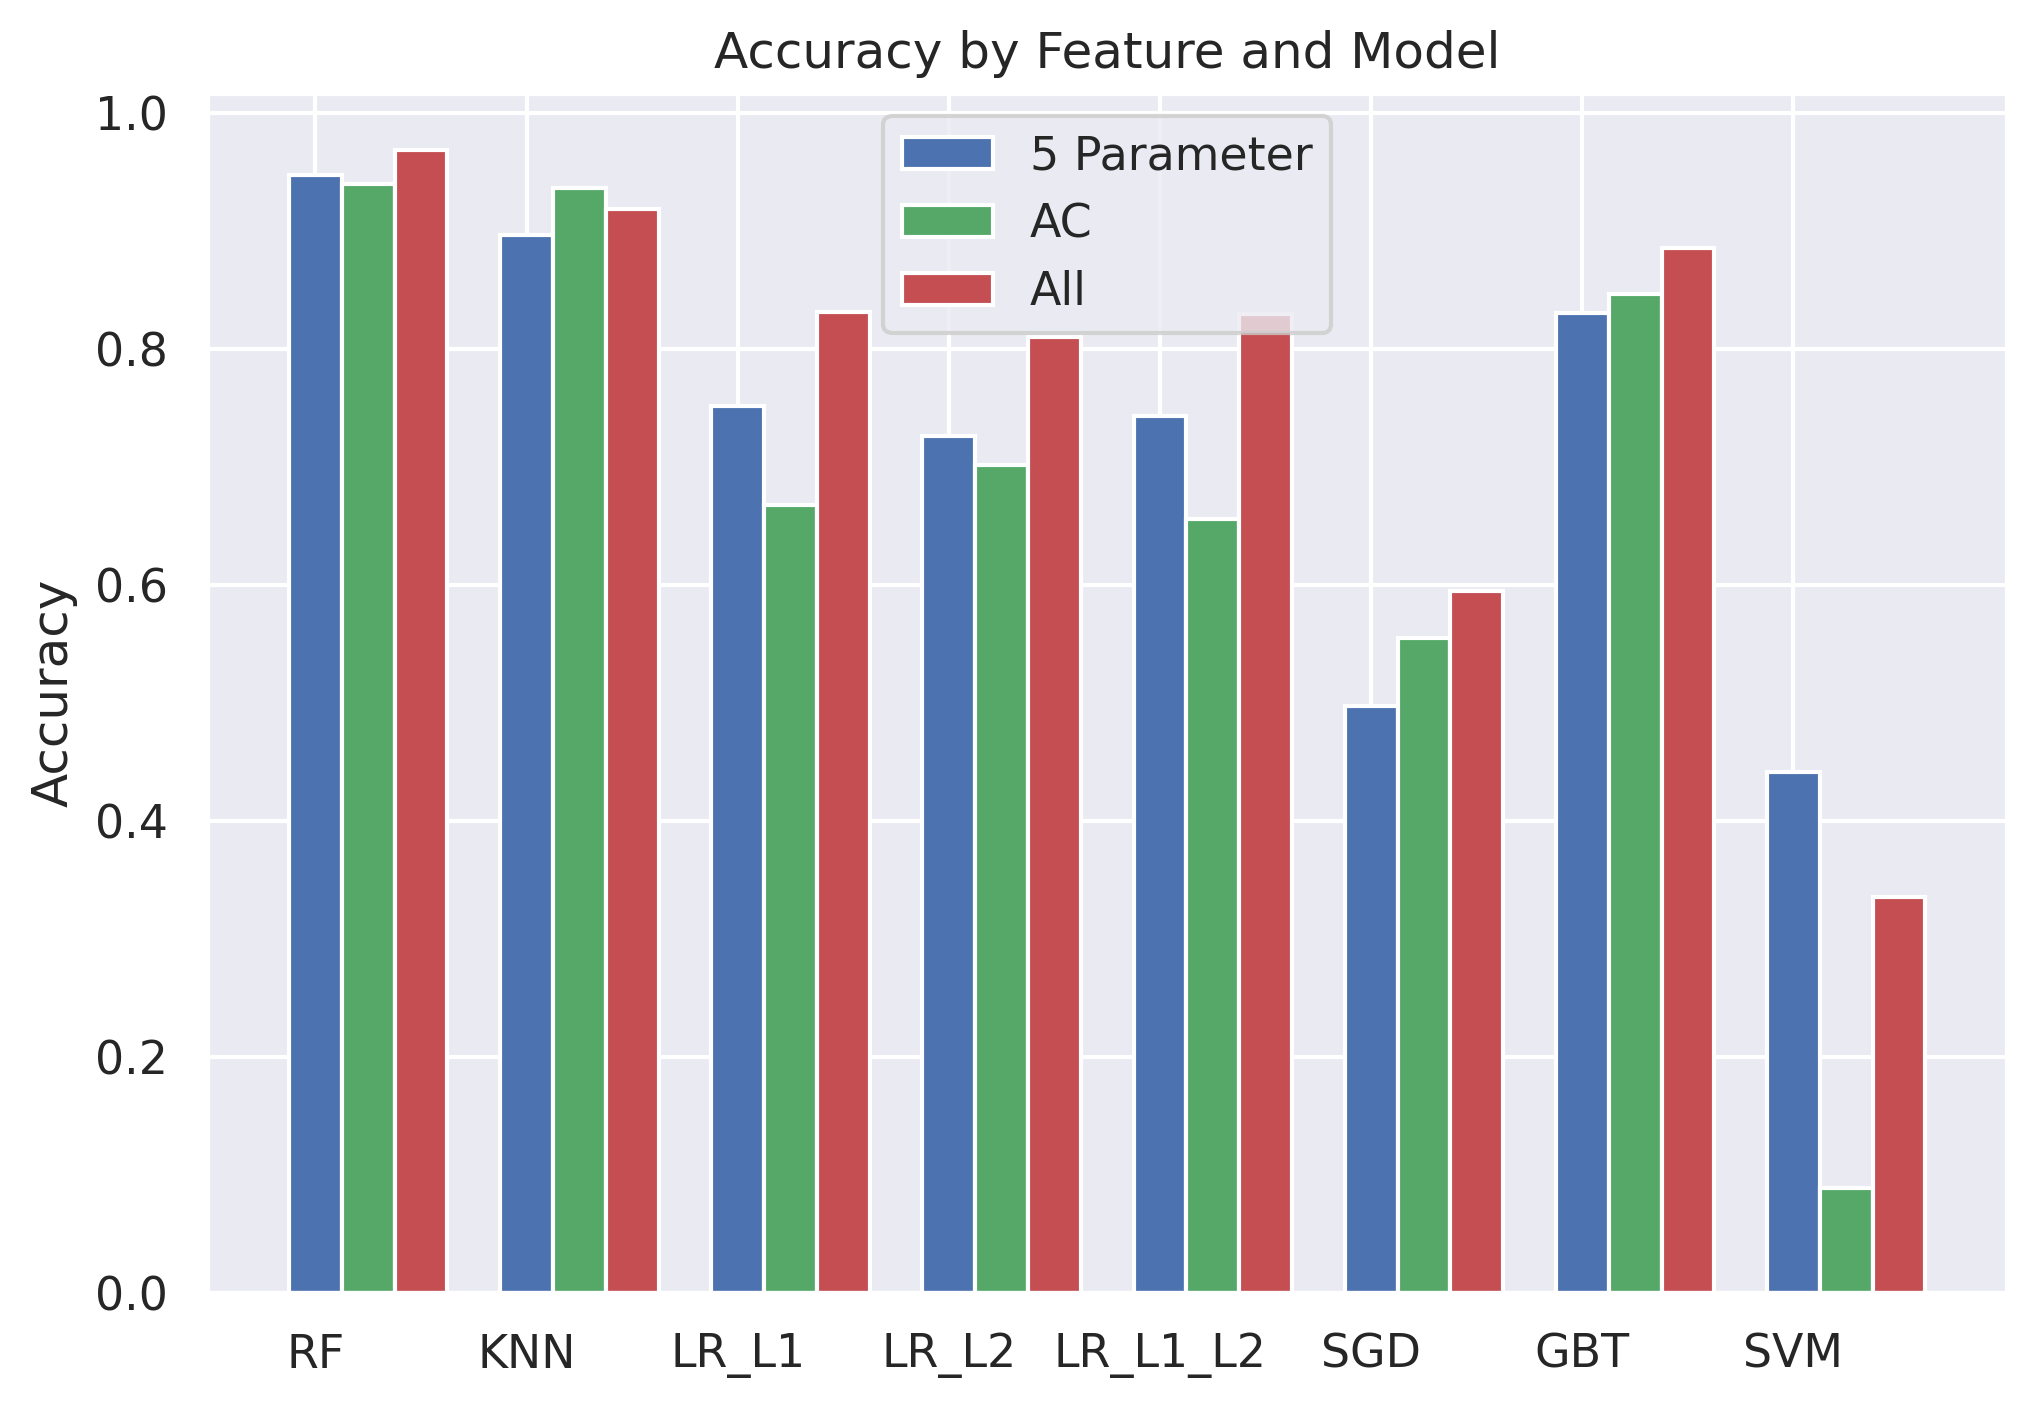

In [ ]:
data = [[rf_5param, knn_5param, LR_L1_5param, LR_L2_5param, LR_L1_L2_5param, SGD_5param, GBT_5param, SVM_5param],
[rf_ac, knn_ac, LR_L1_ac, LR_L2_ac, LR_L1_L2_ac, SGD_ac, GBT_ac, SVM_ac],
[rf_all, knn_all, LR_L1_all, LR_L2_all, LR_L1_L2_all, SGD_all, GBT_all, SVM_all]]
ind  = np.arange(8)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind  + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(ind  + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(ind  + 0.50, data[2], color = 'r', width = 0.25)

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Feature and Model')

ax.set_xticks(ind, ('RF', 'KNN', 'LR_L1', 'LR_L2', 'LR_L1_L2','SGD', 'GBT', 'SVM'))

ax.legend(labels=['5 Parameter', 'AC','All'])

## Neural Network Classifier

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [ ]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)

In [ ]:
def get_class_distribution(obj):
    count_dict = {
        "ad": 0,
        "ia": 0,
        "ib": 0,
        "c19": 0,
        "kp": 0,
    }
    
    for i in obj:
        if i == 0: 
            count_dict['ad'] += 1
        elif i == 1: 
            count_dict['ia'] += 1
        elif i == 2: 
            count_dict['ib'] += 1
        elif i == 3: 
            count_dict['c19'] += 1
        elif i == 4: 
            count_dict['kp'] += 1            
        else:
            print("Check classes.")
            
    return count_dict

Streaming output truncated to the last 5000 lines.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Chec

Text(0.5, 1.0, 'Class Distribution in Test Set')

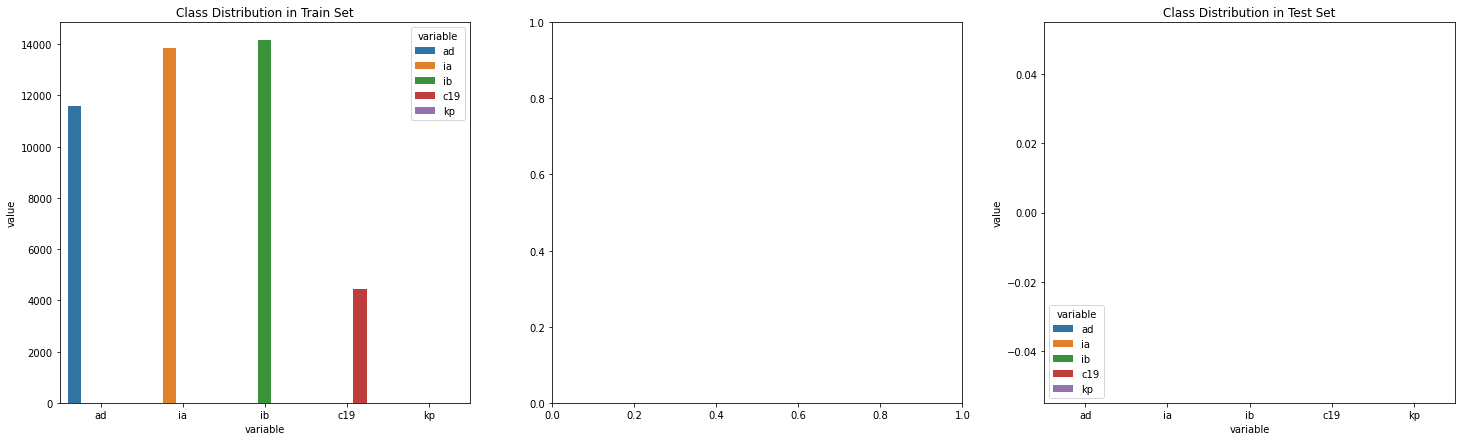

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')
# Validation
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')
# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Class Distribution in Test Set')

In [ ]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([1.1998e-04, 1.0031e-04, 9.8145e-05, 2.1515e-04, 3.1387e-04])


In [ ]:
class_weights_all = class_weights[target_list]


In [ ]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [ ]:
EPOCHS = 200
BATCH_SIZE = 16
LEARNING_RATE = 0.005
NUM_FEATURES = len(X[0])
NUM_CLASSES = 5

In [ ]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=40, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=5, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [ ]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
  # TRAINING
  train_epoch_loss = 0
  train_epoch_acc = 0
  model.train()
  for X_train_batch, y_train_batch in train_loader:
      X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
      optimizer.zero_grad()
      
      y_train_pred = model(X_train_batch)
      
      train_loss = criterion(y_train_pred, y_train_batch)
      train_acc = multi_acc(y_train_pred, y_train_batch)
      
      train_loss.backward()
      optimizer.step()
      
      train_epoch_loss += train_loss.item()
      train_epoch_acc += train_acc.item()
        
        
  # VALIDATION
  with torch.no_grad():
      
      val_epoch_loss = 0
      val_epoch_acc = 0
      
      model.eval()
      for X_val_batch, y_val_batch in val_loader:
          X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
          
          y_val_pred = model(X_val_batch)
                      
          val_loss = criterion(y_val_pred, y_val_batch)
          val_acc = multi_acc(y_val_pred, y_val_batch)
          
          val_epoch_loss += val_loss.item()
          val_epoch_acc += val_acc.item()
  loss_stats['train'].append(train_epoch_loss/len(train_loader))
  loss_stats['val'].append(val_epoch_loss/len(val_loader))
  accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
  accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                        

  print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')

Begin training.


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 200: | Train Loss: 0.12860 | Val Loss: 0.07639 | Train Acc: 96.269| Val Acc: 97.102


Text(0.5, 1.0, 'Train-Val Loss/Epoch')

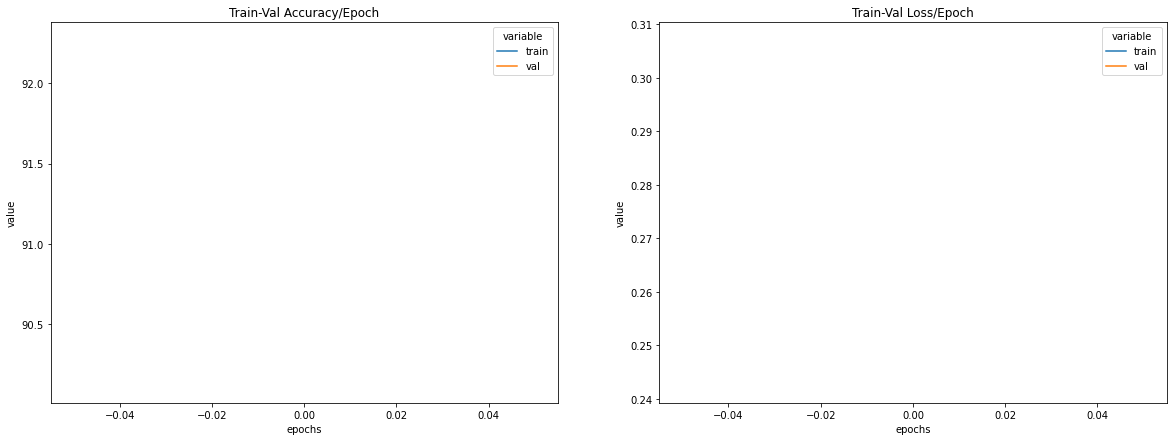

In [ ]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_list)).rename(columns=idx2class, index=idx2class)

sns.heatmap(confusion_matrix_df, annot=True)

NameError: ignored

In [ ]:
print(classification_report(y_test, y_pred_list))